<a href="https://colab.research.google.com/github/julianamycaelle/House_price/blob/main/Trabalho1_introducaoacomputacaoneural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIVERSIDADE FEDERAL DO MARANHÃO
# INTRODUÇÃO À COMPUTAÇÃO NEURAL
# **REDES NEURAIS CONVOLUCIONAIS**
# ALZENEIDE DUTRA 
# JULIANA SILVA

### REDE NEURAL CONVOLUCIONAL NA PRÁTICA
* NESTE TRABALHO A REDE CONVOLUCIONAL IRÁ IDENTIFICAR O NÚMERO ESCRITO A MÃO, SE É ALGUM DOS NÚMEROS ENTRE 0 E 5
* Para treino da nossa rede, nós utilizaremos o seguinte data set:
http://yann.lecun.com/exdb/mnist/


In [20]:
#importação das bibliotecas
import tensorflow as tf
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import cv2
import os

* Vamos importar o datast com os números

In [21]:
dataset = keras.datasets.mnist #carrega dataset
((imagens_treino,classe_treino),(imagens_teste,classe_teste))=dataset.load_data() #divide os dados em dados de teste e de treino

* Mostrando informações a cerca dos dados

In [22]:
#mostra informações a cerca do dataset
print("imagens de treino", len(imagens_treino))
print("imagens de treino", imagens_treino.shape)
print("imagens de teste", len(imagens_teste))
print("classe de teste", imagens_teste.shape)

print("min classe treino", classe_treino.min())
print("max classe teste", classe_treino.max())

imagens de treino 60000
imagens de treino (60000, 28, 28)
imagens de teste 10000
classe de teste (10000, 28, 28)
min classe treino 0
max classe teste 9


In [23]:
#identifica os classificadores 
nome_classificadores = ['0', '1', '2', '3', '4', '5', '6', '7','8','9'] 
total_classificadores = 10;

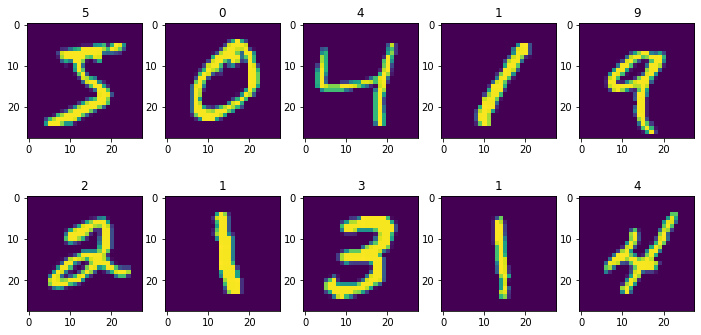

In [24]:
#imprimir 10 digitos do dataset
fig,axes = plt.subplots(figsize=(10,5))
fig.tight_layout()

for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificadores[classe_treino[imagem]])

(60000, 28, 28)


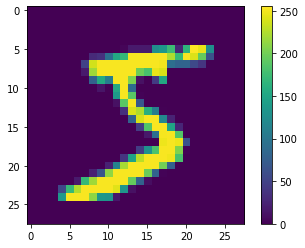

In [25]:
#mostrando a escala de um único digito
plt.imshow(imagens_treino[0])
plt.colorbar()
print(imagens_treino.shape)

In [26]:
# é necessário fazer um tratamento na imagem antes de utilizar ela como entrada
#redefinindo o formato pra 1 vetor
imagens_treino = imagens_treino.reshape((imagens_treino.shape[0],28,28,1)) 
imagens_teste = imagens_teste.reshape((imagens_teste.shape[0],28,28,1)) 
print(imagens_treino.shape)

(60000, 28, 28, 1)


In [27]:
#normalização
imagens_treino = imagens_treino/255
#convolução 2D -> 32 Kernels(3,3)  tamanho real do kernel, imput = imagens 28x28 em 1D pra entrada
# O model será exportado para este arquivo
filename='mnistneuralnet.h5'

#com a rede configurada, é necessário criar a rede, 
#nesta comfiguração, utilizamos a função de perda, que calcula a diferença entre a saida e a entrada 
#escolhe-se também um otimizador
#como metrica que queremos obter é a acurácia.
modelo = tf.keras.models.Sequential([keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1), activation=tensorflow.nn.relu),
                           keras.layers.MaxPooling2D((2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(180,activation=tensorflow.nn.relu),
                           keras.layers.Dense(63,activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                           ])
#compilando o modelo
adam = keras.optimizers.Adam(learning_rate=0.8)
modelo.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics='accuracy')
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               973620    
_________________________________________________________________
dense_4 (Dense)              (None, 63)                11403     
_________________________________________________________________
dropout_1 (Dropout)          (None, 63)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [28]:
hist=modelo.fit(imagens_treino,classe_treino,epochs=5,validation_data=(imagens_teste, classe_teste), batch_size=200)

Epoch 1/5
300/300 [==============================] - 25s 83ms/step - loss: 0.3032 - accuracy: 0.9096 - val_loss: 19.5723 - val_accuracy: 0.9562
Epoch 2/5
300/300 [==============================] - 25s 83ms/step - loss: 0.0934 - accuracy: 0.9720 - val_loss: 13.6641 - val_accuracy: 0.9710
Epoch 3/5
300/300 [==============================] - 25s 82ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 22.5901 - val_accuracy: 0.9594
Epoch 4/5
300/300 [==============================] - 25s 83ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 16.1331 - val_accuracy: 0.9689
Epoch 5/5
300/300 [==============================] - 25s 83ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 14.9883 - val_accuracy: 0.9729


In [29]:
scores = modelo.evaluate(imagens_teste, classe_teste, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 97.29%


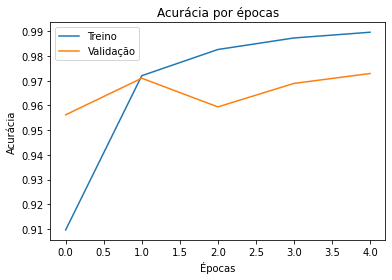

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino','Validação'])

In [31]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,classe_teste)
print(perda_teste)
print(acuracia_teste)
teste = modelo.predict(imagens_teste/255)

313/313 [==============================] - 2s 7ms/step - loss: 14.9883 - accuracy: 0.9729
14.988327026367188
0.9728999733924866


In [32]:
filename='mnistneuralnet.h5'
modelo.save_weights(filename)
modelo.load_weights('./{}'.format(filename) )

<Response [200]>


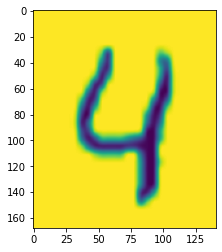

In [33]:
import requests
from PIL import Image
url = 'https://www.classes.cs.uchicago.edu/archive/2015/spring/12300-1/digit.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)


(28, 28)


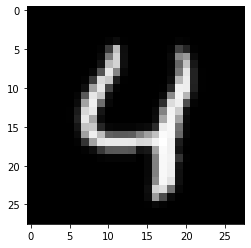

In [34]:
import cv2 

img_array = np.asarray(img)

resized = cv2.resize(img_array, (28,28))
# Caso a imagem orginal seja colorida usar a seguinte conversão para tons de cinza 
#gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray_scale = resized 
image = cv2.bitwise_not(gray_scale)
print(gray_scale.shape)
plt.imshow(image,cmap=plt.get_cmap("gray") )

In [35]:
image = image/255
image = image.reshape(1,28,28,1)

In [38]:
predict_x=modelo.predict(image) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[4]
